In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Métodos para conocer composición del DataFrame

In [3]:
df = pd.read_csv('DataAnalyst.csv')
print(df.head())

   Unnamed: 0                                          Job Title  \
0           0  Data Analyst, Center on Immigration and Justic...   
1           1                               Quality Data Analyst   
2           2  Senior Data Analyst, Insights & Analytics Team...   
3           3                                       Data Analyst   
4           4                             Reporting Data Analyst   

              Salary Estimate  \
0  $37K-$66K (Glassdoor est.)   
1  $37K-$66K (Glassdoor est.)   
2  $37K-$66K (Glassdoor est.)   
3  $37K-$66K (Glassdoor est.)   
4  $37K-$66K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Are you eager to roll up your sleeves and harn...     3.2   
1  Overview\n\nProvides analytical and technical ...     3.8   
2  We’re looking for a Senior Data Analyst who ha...     3.4   
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...     3.9   

       

In [4]:
for x in df:
    print(x)

Unnamed: 0
Job Title
Salary Estimate
Job Description
Rating
Company Name
Location
Headquarters
Size
Founded
Type of ownership
Industry
Sector
Revenue
Competitors
Easy Apply


In [5]:
df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply            object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [8]:
df.describe()

,Unnamed: 0,Rating,Founded
count,2253.0000,2253.000000,2253.000000
mean,1126.0000,3.160630,1398.522858
std,650.5294,1.665228,901.929251
min,0.0000,-1.000000,-1.000000
25%,563.0000,3.100000,-1.000000
50%,1126.0000,3.600000,1979.000000
75%,1689.0000,4.000000,2002.000000
max,2252.0000,5.000000,2019.000000


### Pruebas y Validaciones. Reconocimiento de la data.

In [10]:
#Prueba y validación de valores NaN en df

print("Dataframe el Dataframe: \n")
#print(df)

df_p_null = df.isnull()
print("Dataframe para corroborar: \n")
print(df_p_null)

Dataframe el Dataframe: 

Dataframe para corroborar: 

      Unnamed: 0  Job Title  Salary Estimate  Job Description  Rating  \
0          False      False            False            False   False   
1          False      False            False            False   False   
2          False      False            False            False   False   
3          False      False            False            False   False   
4          False      False            False            False   False   
...          ...        ...              ...              ...     ...   
2248       False      False            False            False   False   
2249       False      False            False            False   False   
2250       False      False            False            False   False   
2251       False      False            False            False   False   
2252       False      False            False            False   False   

      Company Name  Location  Headquarters   Size  Founded  Type of 

In [11]:
#Vuelvo a hacer otro tipo de validación para valores NaN en df

check_for_any_nan= df.isna().any().any()
total_nan_values = df.isna().sum().sum()

print("NaN presentes es df:"+str(check_for_any_nan))
print ("Cantidad total de valores NaN:"+str(total_nan_values))

NaN presentes es df:True
Cantidad total de valores NaN:1


In [12]:
#Mediante el siguiente código, podemos comprobar donde es que están los valores NaN
df.isna().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

### Exploratory Data Analysis

Análisis de los datos de nuestro data set, para hacer primeras aproximaciones sobre los resultados que podamos llegar a tener. Buscar e investigar sobre posibles insights.

#### Análisis Univariado de los datos

##### Location

In [13]:
df.Location.describe()

count             2253
unique             253
top       New York, NY
freq               310
Name: Location, dtype: object

In [14]:
df.Location.value_counts()

New York, NY          310
Chicago, IL           130
San Francisco, CA     119
Austin, TX             81
Los Angeles, CA        80
                     ... 
Inglewood, CA           1
American Fork, UT       1
Harrison, NY            1
Littleton, CO           1
East Palo Alto, CA      1
Name: Location, Length: 253, dtype: int64

In [15]:
count_loc = df['Location'].value_counts()
count_loc / len(df.Location) * 100

New York, NY          13.759432
Chicago, IL            5.770084
San Francisco, CA      5.281846
Austin, TX             3.595206
Los Angeles, CA        3.550821
                        ...    
Inglewood, CA          0.044385
American Fork, UT      0.044385
Harrison, NY           0.044385
Littleton, CO          0.044385
East Palo Alto, CA     0.044385
Name: Location, Length: 253, dtype: float64

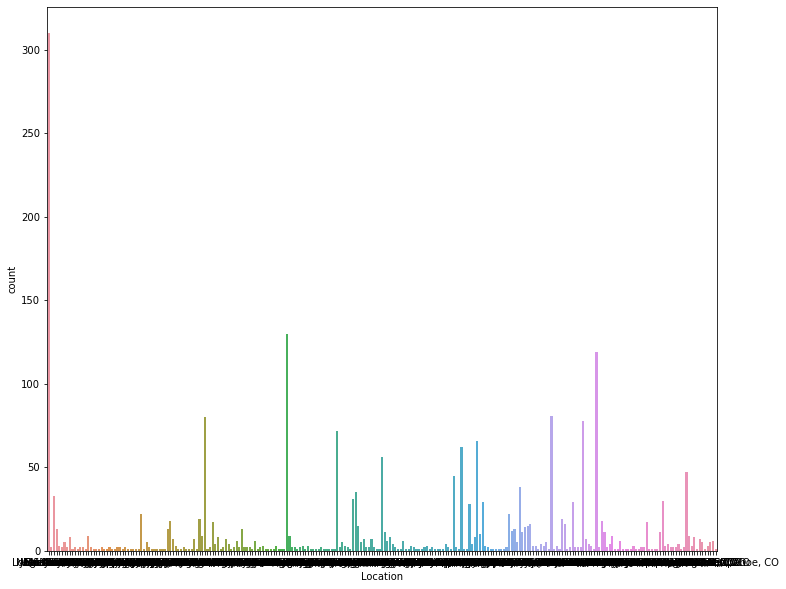

In [23]:
plt.figure(figsize=(12,10))
sns.countplot(data=df, x=df['Location'])

Como no nos sirve este gráfico para Locations, hacemos un split de la data. Vamos a analizar únicamente los estados. 

In [26]:
df["States"] = df["Location"].str.split(", ").str[-1]

print(df['States'])

0       NY
1       NY
2       NY
3       NY
4       NY
        ..
2248    CO
2249    CO
2250    CO
2251    CO
2252    CO
Name: States, Length: 2253, dtype: object


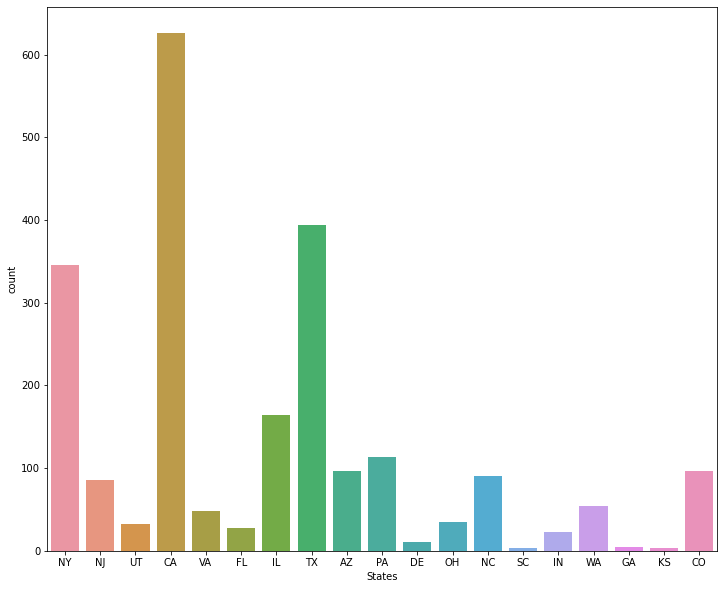

In [27]:
plt.figure(figsize=(12,10))
sns.countplot(data=df, x=df['States'])

Acá ya nos encontramos con un primer insight: Unas celdas de código más arriba, obtuvimos que el valor que más se repetía era el de la Ciudad de Nueva York. En el gráfico (primera columna color rosa), se puede observar como esto es cierto. El problema es que el Estado de California figura con más entradas. Esto significa que, si bien NYC aparece más veces, en el agregado, hay más ciudades de California con anuncios de empleo.   

¿Se podría decir que hay más chances de conseguir un trabajo en California que en Nueva York?
Nos restan más análisis para poder determinar esto. 